In [1]:
cd ../

/project/bengali/bengali-2020


In [2]:
config_file='config/075_r50_plane_focal_cosine_ssr_msd_all_label.yml'
#config_file='config/013_seresnext101_all_aug_noise_off_msd.yml'
idx_fold=0
device_id=0
check_train = True

In [12]:
import argparse
import os
import warnings

import numpy as np
import torch
from tqdm import tqdm as tqdm

from config.base import load_config
from datasets import get_loader

config = load_config(config_file)

if check_train:
    validloader = get_loader('train', config, 0)
else:
    validloader = get_loader('valid', config, 0)

In [4]:
for i, (batch_images, batch_targets) in enumerate(tqdm(validloader)):
    break
    #batch_images = batch_images.to(config.device)

  0%|          | 0/5018 [00:02<?, ?it/s]


In [ ]:
df = train

[[ 67   0   0 992]]


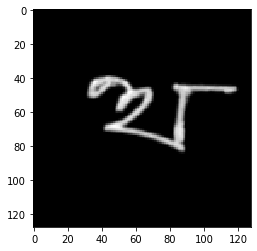

[[ 42   0   0 769]]


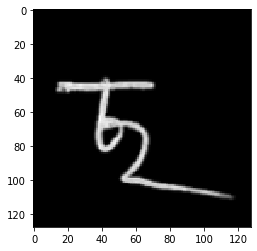

[[101   9   0  10]]


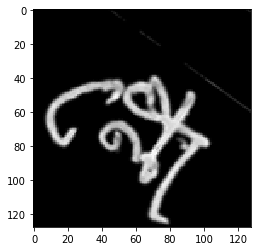

[[115   5   2 142]]


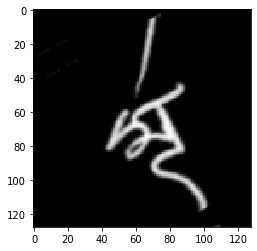

[[ 38   4   4 747]]


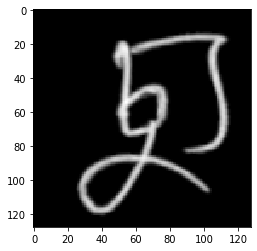

[[  81    7    0 1147]]


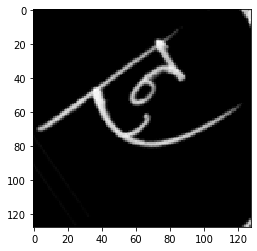

[[151   2   0 488]]


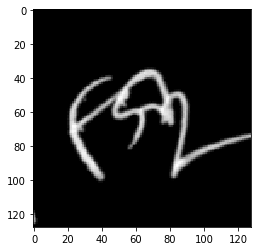

[[ 68   7   0 998]]


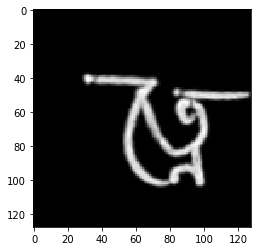

[[159   8   0 544]]


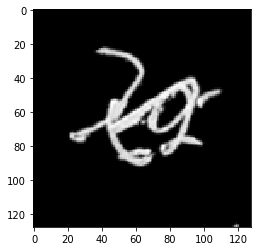

[[151   0   0 484]]


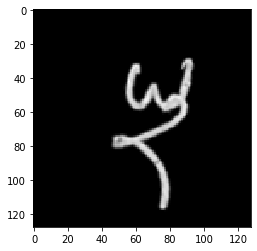

In [6]:
from utils.visualize import show_image
for i in range(10):
    img = batch_images[i]
    label = np.where(batch_targets[i]==1) - np.array([0,168, 168+11, 168+11+7])
    print(label)
    show_image(img)

In [33]:
g_pred = np.load('results/062_srx50_plane_focal_cosine_ssr_msd_resize224_fold0/valid_preds_g.npy')
g_pred.shape

In [34]:
g_true = np.zeros_like(g_pred)
idx = df.query('folds==0')['grapheme_root'].values
g_true[:, idx] = 1

(40244, 168)

In [42]:
idx

array([ 15,  22,  48, ..., 138,  39,  58])

In [44]:
g_true[idx].shape

(40244, 168)

In [46]:
values = df.query('folds==0')['grapheme_root'].values
n_values = np.max(values) + 1
g_true = np.eye(n_values)[values]

In [47]:
g_true.shape

(40244, 168)

In [52]:
yp = g_pred.argmax(axis=1)
yt = df.query('folds==0')['grapheme_root'].values

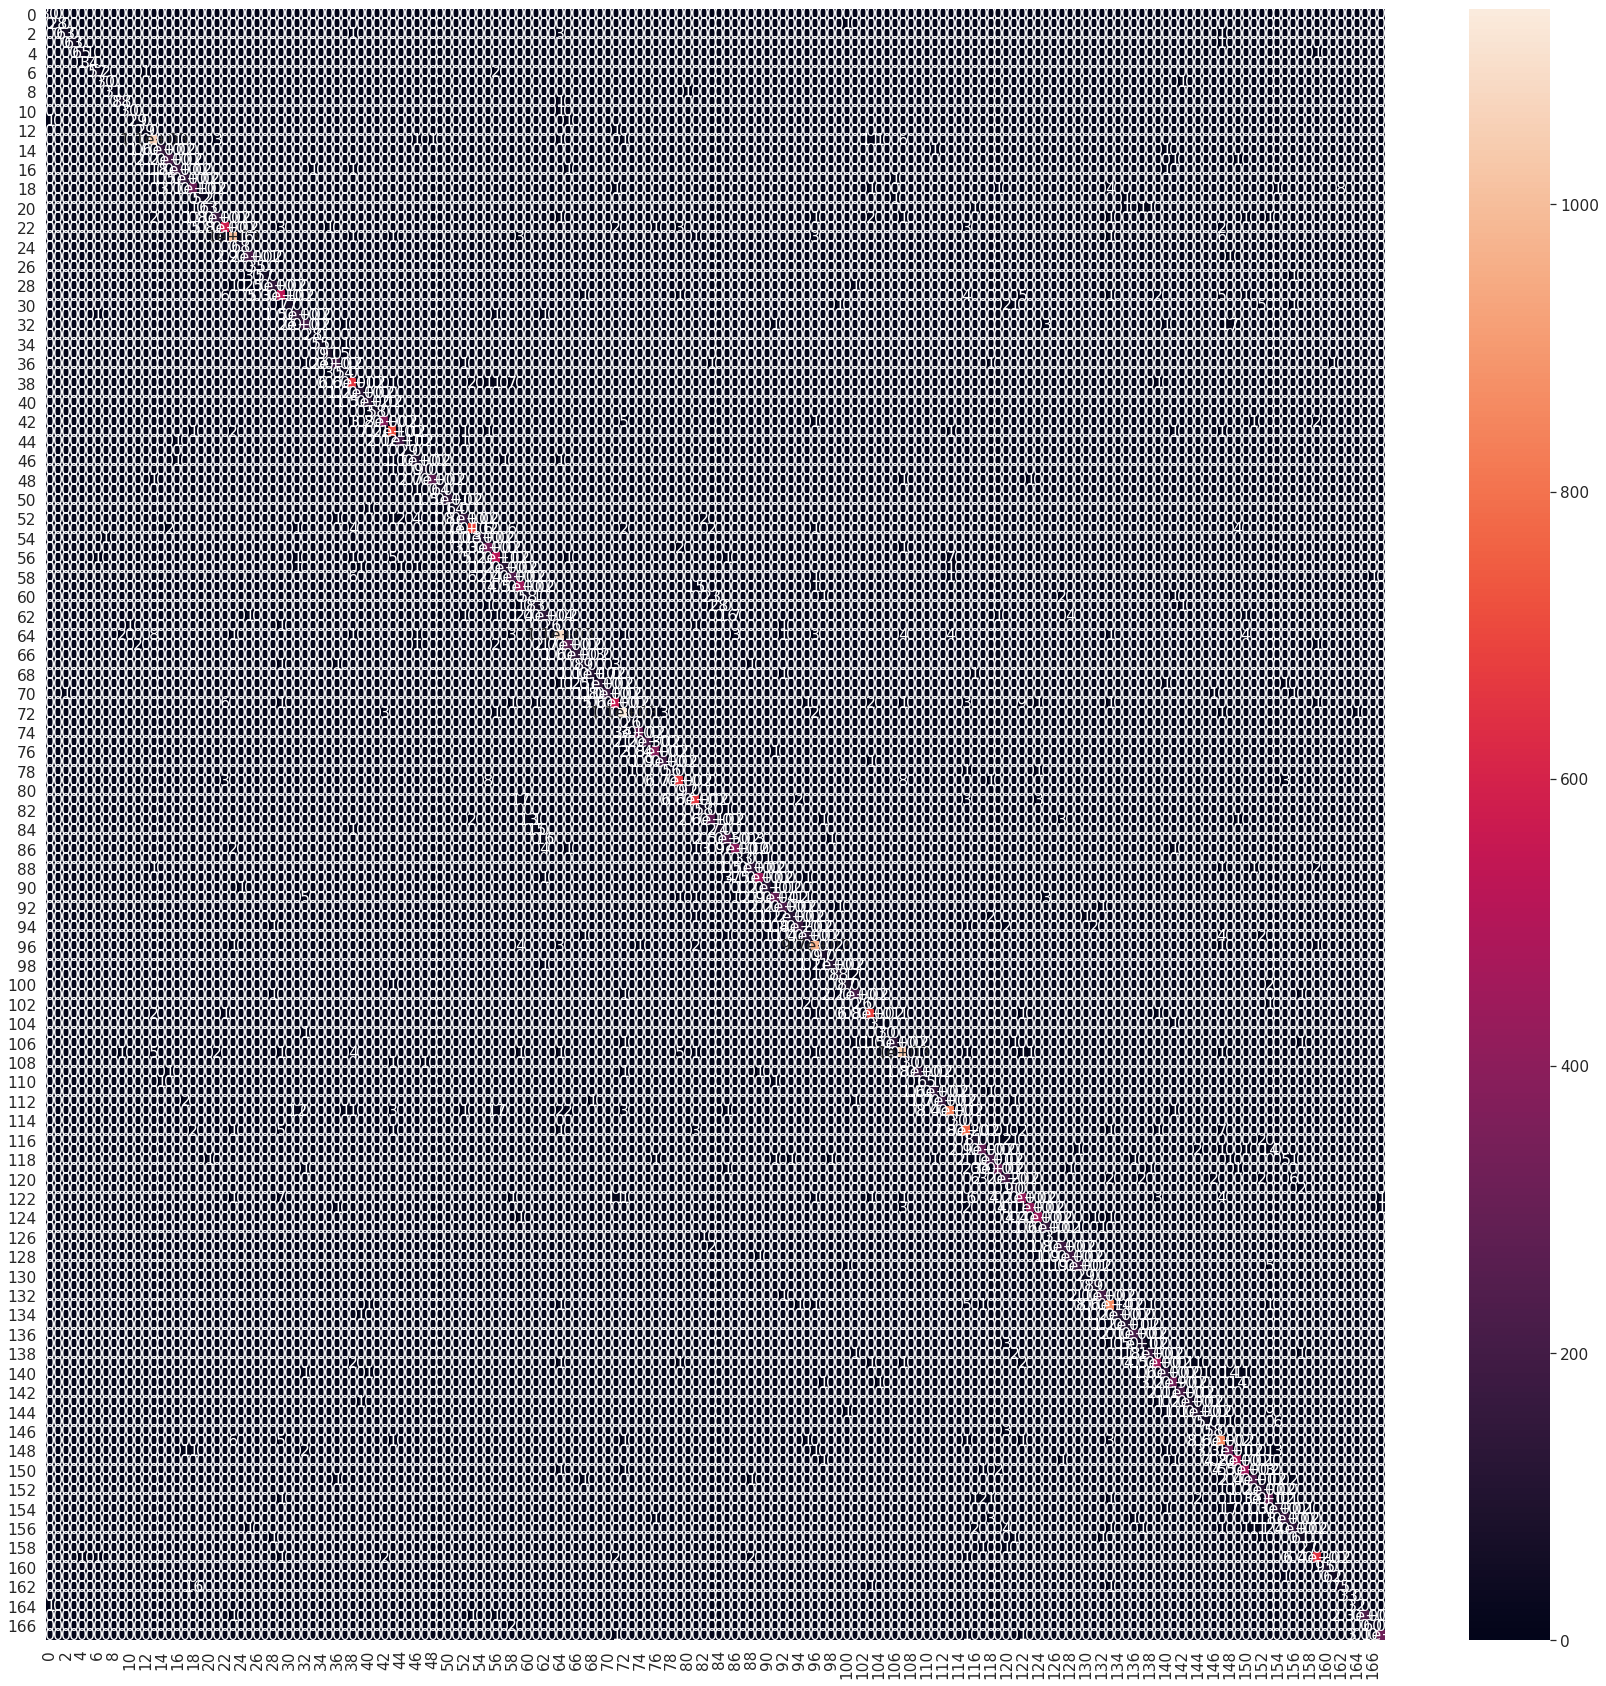

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

array = confusion_matrix(yt, yp)

df_cm = pd.DataFrame(array, range(len(array)), range(len(array)))
plt.figure(figsize=(30,30))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [2]:
import numpy as np
data = np.load('data/c_num_per_class.npy')

In [3]:
data

array([125278,   7424,  23465,    619,  21270,  21397,   1387])

In [5]:
import torch
torch.ones_like(torch.Tensor([1,2,3]))

tensor([1., 1., 1.])

In [7]:
import pandas as pd
train_df = pd.read_csv('../input/bengaliai-cv19/train.csv')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
train_df['grapheme'].value_counts().sort_values()

ক্ষ্ণ     118
ম্নী      126
ঙ্কো      128
ষ্ট্যা    128
ণ্ডি      129
         ... 
র্লি      177
ঝু        177
দ্দা      178
ঘ         178
য়ে        283
Name: grapheme, Length: 1295, dtype: int64

In [11]:
df

NameError: name 'df' is not defined

In [10]:
torch.zeros(16, 186).shape

torch.Size([16, 186])

In [11]:
df

NameError: name 'df' is not defined